<a href="https://colab.research.google.com/github/manthanawgan/MLops-Projects/blob/main/Nagpur_Temperature_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import test_train_split, RandomizedSearchCV

ImportError: cannot import name 'test_train_split' from 'sklearn.model_selection' (/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/__init__.py)

In [3]:
df = pd.read_csv('/content/historical-weather-dataset-ngp.csv')

df.head()

,time,temperature_2m_mean (°C),temperature_2m_max (°C),temperature_2m_min (°C),sunshine_duration (s),shortwave_radiation_sum (MJ/m²),weather_code (wmo code),apparent_temperature_mean (°C),relative_humidity_2m_mean (%),dew_point_2m_mean (°C),cloud_cover_mean (%),wind_speed_10m_mean (km/h),surface_pressure_mean (hPa),et0_fao_evapotranspiration_sum (mm),soil_temperature_0_to_7cm_mean (°C),soil_moisture_0_to_10cm_mean (undefined)
0,1/1/2013,24.7,30.5,20.8,35383.75,13.64,61,27.8,78.0,20.3,26.0,6.2,975.5,2.98,25.8,NaN
1,1/2/2013,24.1,29.4,18.1,35423.55,13.53,2,26.7,74.0,19.0,18.0,6.2,976.3,3.03,25.4,NaN
2,1/3/2013,21.3,27.6,15.6,35615.22,17.20,0,20.9,57.0,11.9,0.0,7.8,978.1,3.79,23.6,NaN
3,1/4/2013,20.8,27.3,14.7,35729.32,17.47,0,20.6,56.0,11.4,0.0,6.0,976.8,3.62,23.0,NaN
4,1/5/2013,21.5,27.7,15.5,35696.16,15.66,0,21.4,57.0,12.3,6.0,6.8,974.7,3.52,23.3,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4511 entries, 0 to 4510
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   time                                      4511 non-null   object 
 1   temperature_2m_mean (°C)                  4510 non-null   float64
 2   temperature_2m_max (°C)                   4511 non-null   float64
 3   temperature_2m_min (°C)                   4511 non-null   float64
 4   sunshine_duration (s)                     4510 non-null   float64
 5   shortwave_radiation_sum (MJ/m²)           4510 non-null   float64
 6   weather_code (wmo code)                   4511 non-null   int64  
 7   apparent_temperature_mean (°C)            4510 non-null   float64
 8   relative_humidity_2m_mean (%)             4510 non-null   float64
 9   dew_point_2m_mean (°C)                    4510 non-null   float64
 10  cloud_cover_mean (%)                

In [5]:
df = df.rename(columns = {
    'time' : 'date',
    'temperature_2m_mean (°C)' : 'mean_temperature',
    'temperature_2m_max (°C)' : 'max_temperature',
    'temperature_2m_min (°C)' : 'min_temperature',
    'sunshine_duration (s)' : 'sunshine_duration',
    'shortwave_radiation_sum (MJ/m²)': 'radiation_sum',
    'weather_code (wmo code)' : 'weather_code',
    'apparent_temperature_mean (°C)' : 'mean_apparent_temperature',
    'relative_humidity_2m_mean (%)' : 'mean_relative_humidity',
    'dew_point_2m_mean (°C)' : 'mean_dew_point',
    'cloud_cover_mean (%)' : 'mean_cloud_cover',
    'wind_speed_10m_mean (km/h)' : 'mean_wind_speed',
    'surface_pressure_mean (hPa)' : 'mean_surface_pressure',
    'et0_fao_evapotranspiration_sum (mm)' : 'evapotranspiration_sum',
    'soil_temperature_0_to_7cm_mean (°C)' : 'mean_soil_temperature',
    'soil_moisture_0_to_10cm_mean (undefined)' : 'mean_soil_moisture'
})

In [6]:
df.head()

,date,mean_temperature,max_temperature,min_temperature,sunshine_duration,radiation_sum,weather_code,mean_apparent_temperature,mean_relative_humidity,mean_dew_point,mean_cloud_cover,mean_wind_speed,mean_surface_pressure,evapotranspiration_sum,mean_soil_temperature,mean_soil_moisture
0,1/1/2013,24.7,30.5,20.8,35383.75,13.64,61,27.8,78.0,20.3,26.0,6.2,975.5,2.98,25.8,NaN
1,1/2/2013,24.1,29.4,18.1,35423.55,13.53,2,26.7,74.0,19.0,18.0,6.2,976.3,3.03,25.4,NaN
2,1/3/2013,21.3,27.6,15.6,35615.22,17.20,0,20.9,57.0,11.9,0.0,7.8,978.1,3.79,23.6,NaN
3,1/4/2013,20.8,27.3,14.7,35729.32,17.47,0,20.6,56.0,11.4,0.0,6.0,976.8,3.62,23.0,NaN
4,1/5/2013,21.5,27.7,15.5,35696.16,15.66,0,21.4,57.0,12.3,6.0,6.8,974.7,3.52,23.3,NaN


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['date']

,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
4506,2025-05-04
4507,2025-05-05
4508,2025-05-06
4509,2025-05-07


In [9]:
print(df['date'])

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
4506   2025-05-04
4507   2025-05-05
4508   2025-05-06
4509   2025-05-07
4510   2025-05-08
Name: date, Length: 4511, dtype: datetime64[ns]


In [10]:
# Creating 'month' and 'year' columns from ddata
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

print(df['month'])
print()
print(df['year'])

0       1
1       1
2       1
3       1
4       1
       ..
4506    5
4507    5
4508    5
4509    5
4510    5
Name: month, Length: 4511, dtype: int32

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
4506    2025
4507    2025
4508    2025
4509    2025
4510    2025
Name: year, Length: 4511, dtype: int32


In [11]:
df

,date,mean_temperature,max_temperature,min_temperature,sunshine_duration,radiation_sum,weather_code,mean_apparent_temperature,mean_relative_humidity,mean_dew_point,mean_cloud_cover,mean_wind_speed,mean_surface_pressure,evapotranspiration_sum,mean_soil_temperature,mean_soil_moisture,month,year
0,2013-01-01,24.7,30.5,20.8,35383.75,13.64,61,27.8,78.0,20.3,26.0,6.2,975.5,2.98,25.8,NaN,1,2013
1,2013-01-02,24.1,29.4,18.1,35423.55,13.53,2,26.7,74.0,19.0,18.0,6.2,976.3,3.03,25.4,NaN,1,2013
2,2013-01-03,21.3,27.6,15.6,35615.22,17.20,0,20.9,57.0,11.9,0.0,7.8,978.1,3.79,23.6,NaN,1,2013
3,2013-01-04,20.8,27.3,14.7,35729.32,17.47,0,20.6,56.0,11.4,0.0,6.0,976.8,3.62,23.0,NaN,1,2013
4,2013-01-05,21.5,27.7,15.5,35696.16,15.66,0,21.4,57.0,12.3,6.0,6.8,974.7,3.52,23.3,NaN,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,2025-05-04,31.4,38.6,25.3,40188.08,24.11,51,32.4,39.0,15.0,15.0,7.4,970.7,6.68,36.1,NaN,5,2025
4507,2025-05-05,32.6,39.3,25.7,41049.59,24.09,3,32.8,33.0,13.0,25.0,8.1,970.7,7.28,37.0,NaN,5,2025
4508,2025-05-06,31.9,38.1,25.4,42207.39,25.30,3,31.9,34.0,12.8,17.0,9.3,971.4,7.63,36.4,NaN,5,2025
4509,2025-05-07,31.2,36.9,25.8,42253.05,25.09,2,31.4,38.0,14.1,12.0,10.4,970.7,7.61,35.7,NaN,5,2025


In [13]:
print(df['mean_soil_moisture'].unique())

print(df['mean_soil_moisture'].nunique())


[nan]
0


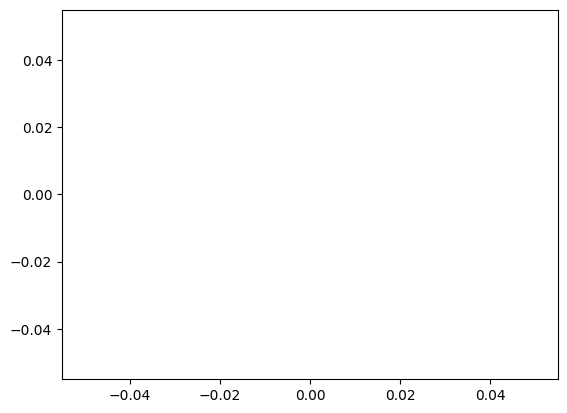

In [17]:
plt.plot(df['mean_soil_moisture'])

In [32]:
df = df.drop('mean_soil_moisture', axis=1)
df.head()

,date,mean_temperature,max_temperature,min_temperature,sunshine_duration,radiation_sum,weather_code,mean_apparent_temperature,mean_relative_humidity,mean_dew_point,mean_cloud_cover,mean_wind_speed,mean_surface_pressure,evapotranspiration_sum,mean_soil_temperature,month,year
0,2013-01-01,24.7,30.5,20.8,35383.75,13.64,61,27.8,78.0,20.3,26.0,6.2,975.5,2.98,25.8,1,2013
1,2013-01-02,24.1,29.4,18.1,35423.55,13.53,2,26.7,74.0,19.0,18.0,6.2,976.3,3.03,25.4,1,2013
2,2013-01-03,21.3,27.6,15.6,35615.22,17.20,0,20.9,57.0,11.9,0.0,7.8,978.1,3.79,23.6,1,2013
3,2013-01-04,20.8,27.3,14.7,35729.32,17.47,0,20.6,56.0,11.4,0.0,6.0,976.8,3.62,23.0,1,2013
4,2013-01-05,21.5,27.7,15.5,35696.16,15.66,0,21.4,57.0,12.3,6.0,6.8,974.7,3.52,23.3,1,2013


In [36]:
new_features = [
    "sunshine_duration", "radiation_sum",
    "weather_code",	"mean_apparent_temperature",
    "mean_relative_humidity",	"mean_dew_point",
    "mean_cloud_cover",	"mean_wind_speed",
    "mean_surface_pressure",	"evapotranspiration_sum",
    "mean_soil_temperature", "month",	"year"
]

In [37]:
#Target : predict mean, max and min temperature
X = df[new_features]
y_mean_temp = df['mean_temperature']
y_min_temp = df['min_temperature']
y_max_temp = df['max_temperature']


In [40]:
#spliting data into training and testing sets [80 - 20 split]
train_size = int(len(df) * 0.8) # 80% train and 20% test
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_mean_train, y_mean_test = y_mean_temp.iloc[:train_size], y_mean_temp.iloc[train_size:]
y_min_train, y_min_test = y_min_temp.iloc[:train_size], y_min_temp.iloc[train_size:]
y_max_train, y_max_test = y_max_temp.iloc[:train_size], y_max_temp.iloc[train_size:]

print(train_size)
print(X_train.shape, X_test.shape)

3608
(3608, 13) (903, 13)


In [41]:
print(df.shape)

(4511, 17)
